In [ ]:
import requests
from bs4 import BeautifulSoup
from operator import itemgetter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
stop_words = ["a",'able','about','a','cross','after','all','almost','also',"or","is","its","it","the",'am','among','an','and','any','are','as','at','be','because','been','but','by','can','cannot','could','dear','did','do','does','either','else','ever','every','for','from','get','got','had','has','have','he','her','hers','him','his','how','however','if','in','into','is','it','its','just','least','let','like','likely','may','me','might','most','must','my','neither','no','nor','not','of','off','often','on','only','or','other','our','own','rather','said','say','says','she','should','since','so','some','than','that','the','their','them','then','there','these','they','this','tis','to','too','twas','us','wants','was','we','were','what','when','where','which','while','who','whom','why','will','with','would','yet','you','your']

In [ ]:
def get_content(article_name):
  article = requests.get(f"https://en.wikipedia.org/wiki/{article_name}")
  new = BeautifulSoup(article.text,'html.parser').select_one('div.vector-body')
  all = new.find_all('p')
  return all


In [ ]:
def merge_contents(data):
  all_data = ''
  for x in data:
    all_data += x.text+ ' '
  return all_data

In [ ]:
def tokenize(content):
  list_d = []
  for i in content.split():
    if i.isalpha():
      list_d.append(i)
  return list_d

In [ ]:
def lower_collection(collection):
    return [i.lower() for i in collection if i.lower() not in stop_words]
    


In [ ]:
def count_frequency(collection):
  Count = {}
  for k in collection:
    word_count = collection.count(k)
    Count[k] = word_count
  return Count

In [ ]:

def print_most_frequent(frequencies, n):
  sort = sorted(frequencies.items(), key=itemgetter(1), reverse=True)
  sort = sort[0:n]
  return sort

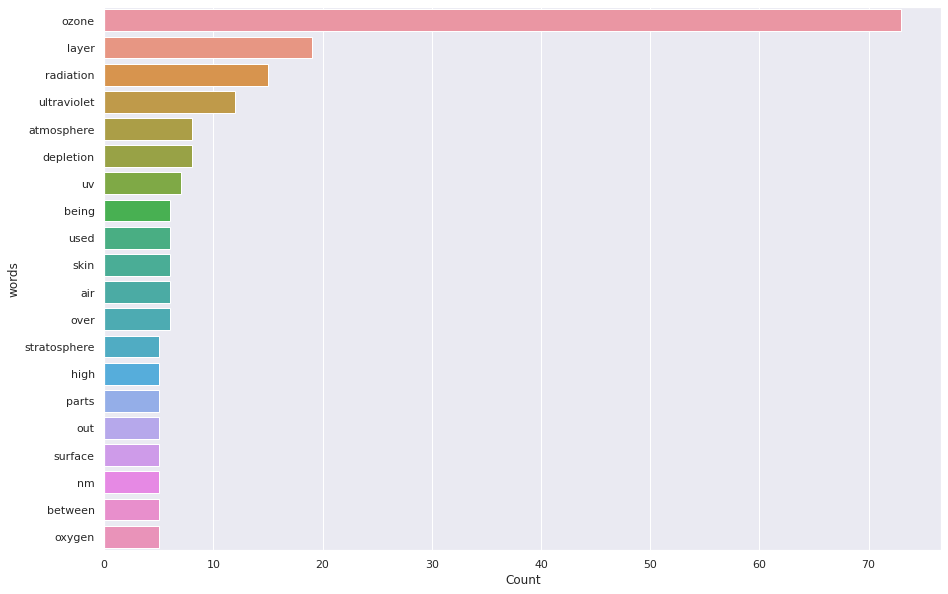

In [ ]:
def main():
  all = get_content('Ozone_layer')
  all_data = merge_contents(all)
  collection = tokenize(all_data)
  redy = lower_collection(collection)
  frequencies = count_frequency(redy)
  res = print_most_frequent(frequencies, 20)

  data_frame = pd.DataFrame(res)
  data_frame = data_frame.rename(columns={0: 'words', 1: 'Count'})
  fig, ax = plt.subplots(figsize=(15,10))
  sns.barplot(x='Count', y='words', data=data_frame)
  # sns.set(font_scale=1)
  plt.show()  
 

main()